# SV model with variational particle filter

In [1]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
pd.set_option('precision', 4)

import ptvi

dtype = torch.float64
nparticles = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
data_seed, algo_seed = 1234, 1234
params = dict(a=1., b=0., c=.95)
T = 100

In [3]:
model = ptvi.FilteredStochasticVolatilityModelFixedParams(
    input_length=T, num_particles=nparticles, resample=True, dtype=dtype, device=device)
model

Stochastic volatility model:
	x_t = exp(a * z_t/2) ε_t        t=1, …, 100
	z_t = b + c * z_{t-1} + ν_t,    t=2, …, 100
	z_1 = b + 1/√(1 - c^2) ν_1
	where ε_t, ν_t ~ Ν(0,1)

Particle filter with 20 particles, AR(1) proposal:
	z_t = d + e * z_{t-1} + f η_t,  t=2, …, 100
	z_1 = d + f/√(1 - e^2) η_1
	where η_t ~ Ν(0,1)

In [4]:
torch.manual_seed(data_seed)
y, z_true = model.simulate()

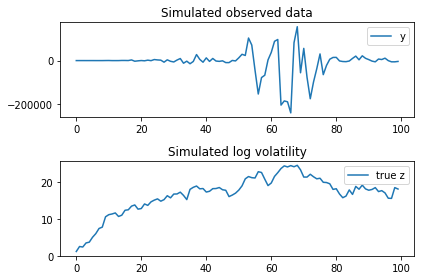

In [5]:
plt.subplot(211); plt.plot(y.cpu().numpy(), label='y')
plt.title('Simulated observed data')
plt.legend();
plt.subplot(212); plt.plot(z_true.cpu().numpy(), label='true z')
plt.legend()
plt.title('Simulated log volatility');
plt.tight_layout()

In [6]:
torch.manual_seed(algo_seed)
trace = ptvi.PointEstimateTracer(model)
fit = ptvi.stoch_opt(model, y, tracer=trace, max_iters=300, opt_type=torch.optim.SGD, lr=0.1)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Stochastic optimization for Particle filtered stochastic volatility model
  - Searching for point estimates only
  - Using torch.float64 precision on cpu
  - Minimum supremum growth heuristic (min_steps=500, patience=20, skip=10, ε=0.1)
  - SGD optimizer with param groups:
    group 0. lr=0.1, momentum=0, dampening=0, weight_decay=0, nesterov=False
  - Displayed loss is smoothed with λ=0.1
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
       0. smoothed stochastic loss = -1057.8


Exception: Overflow: log_w = tensor([ -41039204645930142827282432., -144047880297111261104046080.,
        -159481191732980217488080896.,   -2045529824697385236824064.,
          -5231452148588575495028736.,  -15420873548719223505682432.,
          -6770352288145979830435840., -315872038934676425387540480.,
        -274370972521543231810306048.,   -4443018784763321320996864.,
        -203948116610458910581587968.,   -5767104578535399094222848.,
          -4160202137675798958571520.,  -14660699952798178555723776.,
                           122945536.,  -13152976280502527240175616.,
          -3873483521612384015745024.,   -9812401399964420653711360.,
          -1410019888468134620823552.,   -5457612032191651834232832.],
       dtype=torch.float64, grad_fn=<ThAddBackward>)

In [ ]:
trace.plot_objectives()

In [ ]:
trace.plot(figsize=[8,10], true=params)

In [ ]:
fit.summary(true=params)

In [8]:
log_w =  torch.tensor([ -41039204645930142827282432., -144047880297111261104046080.,
        -159481191732980217488080896.,   -2045529824697385236824064.,
          -5231452148588575495028736.,  -15420873548719223505682432.,
          -6770352288145979830435840., -315872038934676425387540480.,
        -274370972521543231810306048.,   -4443018784763321320996864.,
        -203948116610458910581587968.,   -5767104578535399094222848.,
          -4160202137675798958571520.,  -14660699952798178555723776.,
                           122945536.,  -13152976280502527240175616.,
          -3873483521612384015745024.,   -9812401399964420653711360.,
          -1410019888468134620823552.,   -5457612032191651834232832.],
       dtype=torch.float64)

In [9]:
w = torch.exp(log_w)

In [10]:
w

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000,    inf, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000], dtype=torch.float64)

AttributeError: module 'torch' has no attribute 'bitwisenot'